In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pathlib import Path
import hvplot.pandas
import requests
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load your data into a Pandas DataFrame
df = pd.read_csv("../Resources/projectdata.csv")
df.head()


,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population
0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,171250.000000,28.033886,1.659626,43451666
1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,25209.999080,-11.202692,17.873887,33428485
2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,519.999981,17.060816,-61.796428,92664
3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,168100.006100,-38.416097,-63.616672,45036032
4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,64769.996640,47.516231,14.550072,8907777


In [3]:
#import files and read the data
main_data_path = Path("../Resources/projectdata.csv")
main_data = pd.read_csv(main_data_path)
main_data

,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population
0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,1.712500e+05,28.033886,1.659626,43451666
1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,2.521000e+04,-11.202692,17.873887,33428485
2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,5.200000e+02,17.060816,-61.796428,92664
3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,1.681000e+05,-38.416097,-63.616672,45036032
4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,6.477000e+04,47.516231,14.550072,8907777
...,...,...,...,...,...,...,...,...,...,...,...,...
98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,1.888600e+05,23.424076,53.847818,9287289
99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,3.489200e+05,55.378051,-3.435973,67059474
100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4.817720e+06,37.090240,-95.712891,335942003
101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6.490000e+03,-32.522779,-55.765835,3429086


In [4]:
# Calculate average CO2 emissions per country
co2_emissions_by_country =main_data.groupby('Country')['co2 Emissions (metric tons per capita)'].mean()
co2_emissions_by_country

# low_co2_emissions_avg = co2_emissions_by_country[co2_emissions_by_country['co2 Emission (metric tons per capita)'] == 'Low']['Low-carbon electricity (% electricity)'].mean()
# high_co2_emissions_avg = co2_emissions_by_country[co2_emissions_by_country['co2 Emission (metric tons per capita'] == 'High']['Low-carbon electricity (% electricity)'].mean()




Country
Algeria                 1.712500e+05
Angola                  2.521000e+04
Antigua and Barbuda     5.200000e+02
Argentina               1.681000e+05
Austria                 6.477000e+04
                            ...     
United Arab Emirates    1.888600e+05
United Kingdom          3.489200e+05
United States           4.817720e+06
Uruguay                 6.490000e+03
Vanuatu                 2.100000e+02
Name: co2 Emissions (metric tons per capita), Length: 103, dtype: float64

In [5]:
# Set your CO2 emissions threshold

threshold = 3.32E-6

main_data['co2-emission catagory'] = ['High' if x > threshold else 'Low' for x in main_data['co2 Emissions (metric tons per capita)']]
main_data

,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,co2-emission catagory
0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,1.712500e+05,28.033886,1.659626,43451666,High
1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,2.521000e+04,-11.202692,17.873887,33428485,High
2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,5.200000e+02,17.060816,-61.796428,92664,High
3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,1.681000e+05,-38.416097,-63.616672,45036032,High
4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,6.477000e+04,47.516231,14.550072,8907777,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,1.888600e+05,23.424076,53.847818,9287289,High
99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,3.489200e+05,55.378051,-3.435973,67059474,High
100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4.817720e+06,37.090240,-95.712891,335942003,High
101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6.490000e+03,-32.522779,-55.765835,3429086,High


In [6]:
main_data['co2 Emissions (metric tons per capita)']

0      1.712500e+05
1      2.521000e+04
2      5.200000e+02
3      1.681000e+05
4      6.477000e+04
           ...     
98     1.888600e+05
99     3.489200e+05
100    4.817720e+06
101    6.490000e+03
102    2.100000e+02
Name: co2 Emissions (metric tons per capita), Length: 103, dtype: float64

In [7]:
main_data['co2-emission catagory'].unique()

array(['High'], dtype=object)

In [8]:
low_co2_avg = main_data[main_data['co2-emission catagory'] == 'Low']['Low-carbon electricity (% electricity)'].mean()
high_co2_avg = main_data[main_data['co2-emission catagory'] == 'High']['Low-carbon electricity (% electricity)'].mean()



# Print the results
print(f'Average Low-Carbon Electricity Percentage for Low CO2 Emissions Countries: {low_co2_avg}')
print(f'Average Low-Carbon Electricity Percentage for High CO2 Emissions Countries: {high_co2_avg}')

Average Low-Carbon Electricity Percentage for Low CO2 Emissions Countries: nan
Average Low-Carbon Electricity Percentage for High CO2 Emissions Countries: 35.25776505116505


Text(0.5, 1.0, 'Relationship between CO2 Emissions and Low-Carbon Electricity Use')

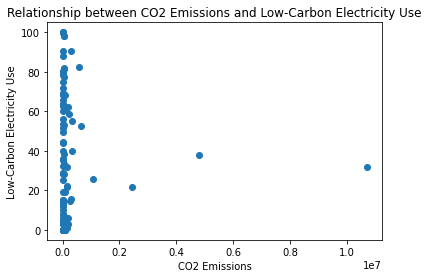

In [9]:
# Create a scatter plot
plt.scatter(df['co2 Emissions (metric tons per capita)'], df['Low-carbon electricity (% electricity)'])
plt.xlabel('CO2 Emissions')
plt.ylabel('Low-Carbon Electricity Use')
plt.title('Relationship between CO2 Emissions and Low-Carbon Electricity Use')

In [10]:
category_means = main_data.groupby('co2 Emissions (metric tons per capita)')['Low-carbon electricity (% electricity)'].mean()
category_means

co2 Emissions (metric tons per capita)
6.000000e+01      0.000000
9.000000e+01      0.000000
1.600000e+02     14.285714
2.100000e+02     28.571428
2.400000e+02    100.000000
                   ...    
6.574000e+05     52.611385
1.081570e+06     25.860157
2.456300e+06     21.475914
4.817720e+06     37.759180
1.070722e+07     31.672895
Name: Low-carbon electricity (% electricity), Length: 101, dtype: float64

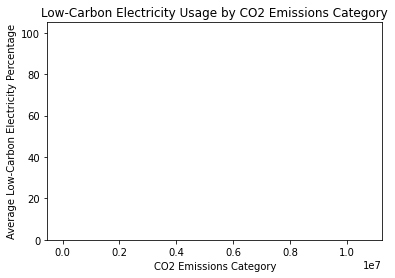

In [11]:
# Create a bar graph
# plt.bar(['co2 Emissions (metric tons per capita)'], df['Low-carbon electricity (% electricity)'], color=['blue', 'red'])

plt.bar(category_means.index, category_means.values)
plt.xlabel('CO2 Emissions Category')
plt.ylabel('Average Low-Carbon Electricity Percentage')
plt.title('Low-Carbon Electricity Usage by CO2 Emissions Category')
# plt.ylim(0, 100)  # Set the y-axis limits to represent percentages (0 to 100)
plt.show()